In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wooldridge
import pandas as pd


In [3]:


wage1 = wooldridge.data('wage1')
bwght = wooldridge.data('bwght')
meap01 = wooldridge.data('meap01')
jtrain2 = wooldridge.data('jtrain2')
fertil2 = wooldridge.data('fertil2')


 C1 Use the data in WAGE1.RAW for this exercise.
 
(i) Find the average education level in the sample. What are the lowest and highest 
years of education?

(ii) Find the average hourly wage in the sample. Does it seem high or low?


(iii) The wage data are reported in 1976 dollars. Using the Economic Report of the 
President (2011 or later), obtain and report the Consumer Price Index (CPI) for 
the years 1976 and 2010.

(iv) Use the CPI values from part (iii) to find the average hourly wage in 2010 dollars. 
Now does the average hourly wage seem reasonable?

(v) How many women are in the sample? How many men?

In [5]:
print (wage1.head(5))
print (wage1.shape)
# print the names of the columns
print (wage1.columns)
# 


   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4        0  
1        1  1.175573      48

In [9]:
# Average education level in the sample
print (f"Average education level in the sample: {wage1['educ'].mean()}")
# Lowest and highest years of education
print (f"Lowest years of education: {wage1['educ'].min()}")
print (f"Highest years of education: {wage1['educ'].max()}")

# Average hourly wage in the sample
print (f"Average hourly wage in the sample: {wage1['wage'].mean()}")

# CPI for the years 1976 and 2024
cpi_1976 = 56.9  # CPI promedio de 1976
cpi_2024 = 309.686  # CPI de marzo 2024 (último dato disponible)

# Average hourly wage in 2024 dollars
average_wage_2024 = wage1['wage'].mean() * (cpi_2024 / cpi_1976)
print (f"Average hourly wage in 2024 dollars: {average_wage_2024}")

# How many women are in the sample
print (f"Number of women in the sample: {wage1['female'].sum()}")
 # the number of men is the total number of observations minus the number of women
print (f"Number of men in the sample: {wage1.shape[0] - wage1['female'].sum()}")


Average education level in the sample: 12.562737642585551
Lowest years of education: 0
Highest years of education: 18
Average hourly wage in the sample: 5.896102674787035
Average hourly wage in 2024 dollars: 32.09034187950963
Number of women in the sample: 252
Number of men in the sample: 274


C2 Use the data in BWGHT.RAW to answer this question.

(i) How many women are in the sample, and how many report smoking during 
pregnancy?

(ii) What is the average number of cigarettes smoked per day? Is the average a good 
measure of the “typical” woman in this case? Explain.

(iii) Among women who smoked during pregnancy, what is the average number 
of cigarettes smoked per day? How does this compare with your answer from 
part (ii), and why?

(iv) Find the average of fatheduc in the sample. Why are only 1,192 observations used 
to compute this average?

(v) Report the average family income and its standard deviation in dollars.

In [16]:
# How many women are in the sample, and how many report smoking during pregnancy?
print (f"Number of women in the sample: {bwght.shape[0]}")
print (f"Number of women who report smoking during pregnancy: {bwght[bwght['cigs'] > 0].shape[0]}")

# Average number of cigarettes smoked per day
print (f"Average number of cigarettes smoked per day: {bwght['cigs'].mean()}") # Not representative due to excessive number of 0's

# If cigs is greater than 0, what is the average number of cigarettes smoked per day?
print (f"Average number of cigarettes smoked per day: {bwght[bwght['cigs'] > 0]['cigs'].mean()}")

# Fatheduc count and average
print (f"Average of fatheduc: {bwght['fatheduc'].mean()}")
# Only 1,192 observations used to compute this average because the variable fatheduc has missing values (NaN)

# Average family income and its standard deviation in dollars
print (f"Average family income in 1000's of dollars: {bwght['faminc'].mean()}")
print (f"Standard deviation of family income in 1000's of dollars: {bwght['faminc'].std()}")




Number of women in the sample: 1388
Number of women who report smoking during pregnancy: 212
Average number of cigarettes smoked per day: 2.0871757925072045
Average number of cigarettes smoked per day: 13.665094339622641
Average of fatheduc: 13.186241610738255
Average family income in 1000's of dollars: 29.026657060518733
Standard deviation of family income in 1000's of dollars: 18.73928463224534


C3 The data in MEAP01.RAW are for the state of Michigan in the year 2001. Use these 
data to answer the following questions.

(i) Find the largest and smallest values of math4. Does the range make sense? 
Explain.

(ii) How many schools have a perfect pass rate on the math test? What percentage is 
this of the total sample?
(iii) How many schools have math pass rates of exactly 50%?
(iv) Compare the average pass rates for the math and reading scores. Which test is 
harder to pass?

(v) Find the correlation between math4 and read4. What do you conclude?

(vi) The variable exppp is expenditure per pupil. Find the average of exppp along 
with its standard deviation. Would you say there is wide variation in per pupil 
spending?

(vii) Suppose School A spends $6,000 per student and School B spends $5,500 per 
student. By what percentage does School A’s spending exceed School B’s? Compare this to 100 ·[log(6,000) – log(5,500)], which is the approximation percentage difference based on the difference in the natural logs. 

In [17]:
# Columns of the data and shape
print (f"Columns of the data: {meap01.columns}")
print (f"Shape of the data: {meap01.shape}")



Columns of the data: Index(['dcode', 'bcode', 'math4', 'read4', 'lunch', 'enroll', 'expend',
       'exppp', 'lenroll', 'lexpend', 'lexppp'],
      dtype='object')
Shape of the data: (1823, 11)


In [22]:
# largest and smallest values of math4
print (f"Largest value of math4: {meap01['math4'].max()}")
print (f"Smallest value of math4: {meap01['math4'].min()}")

# How many schools have a perfect pass rate on the math test? What percentage is this of the total sample?
print (f"Number of schools with a perfect pass rate on the math test: {meap01[meap01['math4'] == 100].shape[0]}")
print (f"Percentage of schools with a perfect pass rate on the math test: {(meap01[meap01['math4'] == 100].shape[0] / meap01.shape[0]) * 100}%")

# How many schools have math pass rates of exactly 50%?
print (f"Number of schools with math pass rates of exactly 50%: {meap01[meap01['math4'] == 50].shape[0]}")

# Compare the average pass rates for the math and reading scores. Which test is harder to pass?
print (f"Average pass rate for the math test: {meap01['math4'].mean()}")
print (f"Average pass rate for the reading test: {meap01['read4'].mean()}")

# Find the correlation between math4 and read4. What do you conclude?
print (f"Correlation between math4 and read4: {meap01['math4'].corr(meap01['read4'])}") #the correlation is 0.84, which means that the two tests are highly correlated

# The variable exppp is expenditure per pupil. Find the average of exppp along with its standard deviation. Would you say there is wide variation in per pupil spending?
print (f"Average of exppp: {meap01['exppp'].mean()}")
print (f"Standard deviation of exppp: {meap01['exppp'].std()}")
# The average is 5194.86 and the std is 1091.88, which means that there is a wide variation in per pupil spending

# Suppose School A spends $6,000 per student and School B spends $5,500 per student. By what percentage does School A’s spending exceed School B’s? Compare this to 100 ·[log(6,000) – log(5,500)], which is the approximation percentage difference based on the difference in the natural logs. 
print (f"Percentage difference between School A and School B: {100 * (6000 - 5500) / 5500}%")
print (f"Percentage difference based on the difference in the natural logs: {100 * (np.log(6000) - np.log(5500))}")







Largest value of math4: 100.0
Smallest value of math4: 0.0
Number of schools with a perfect pass rate on the math test: 38
Percentage of schools with a perfect pass rate on the math test: 2.084476138233681%
Number of schools with math pass rates of exactly 50%: 17
Average pass rate for the math test: 71.90899606805154
Average pass rate for the reading test: 60.06187602862904
Correlation between math4 and read4: 0.842728145772116
Average of exppp: 5194.865478314741
Standard deviation of exppp: 1091.8895972167838
Percentage difference between School A and School B: 9.090909090909092%
Percentage difference based on the difference in the natural logs: 8.701137698962924


The data in JTRAIN2.RAW come from a job training experiment conducted for lowincome men during 1976–1977; see Lalonde (1986).

(i) Use the indicator variable train to determine the fraction of men receiving job 
training.

(ii) The variable re78 is earnings from 1978, measured in thousands of 1982 dollars. 
Find the averages of re78 for the sample of men receiving job training and the 
sample not receiving job training. Is the difference economically large?

(iii) The variable unem78 is an indicator of whether a man is unemployed or not in 
1978. What fraction of the men who received job training are unemployed? What 
about for men who did not receive job training? Comment on the difference.

(iv) From parts (ii) and (iii), does it appear that the job training program was effective? 
What would make our conclusions more convincing?

In [23]:
#jtrain2 shape and columns
print (f"Shape of the data: {jtrain2.shape}")
print (f"Columns of the data: {jtrain2.columns}")


Shape of the data: (445, 19)
Columns of the data: Index(['train', 'age', 'educ', 'black', 'hisp', 'married', 'nodegree',
       'mosinex', 're74', 're75', 're78', 'unem74', 'unem75', 'unem78',
       'lre74', 'lre75', 'lre78', 'agesq', 'mostrn'],
      dtype='object')


In [25]:
# Average of re78 for the sample of men receiving job training and the sample not receiving job training
print (f"Average of re78 for the sample of men receiving job training: {jtrain2[jtrain2['train'] == 1]['re78'].mean()}")
print (f"Average of re78 for the sample of men not receiving job training: {jtrain2[jtrain2['train'] == 0]['re78'].mean()}")

# Fraction of the men who received job training and the sample not receiving job training
print (f"Fraction of the men who received job training: {jtrain2[jtrain2['train'] == 1].shape[0] / jtrain2.shape[0]}")
print (f"Fraction of the men who did not receive job training: {jtrain2[jtrain2['train'] == 0].shape[0] / jtrain2.shape[0]}")

# What fraction of the men who received job training are unemployed? What about for men who did not receive job training? Comment on the difference.
print (f"Fraction of the men who received job training and are unemployed: {jtrain2[(jtrain2['train'] == 1) & (jtrain2['unem78'] == 1)].shape[0] / jtrain2[jtrain2['train'] == 1].shape[0]}")
print (f"Fraction of the men who did not receive job training and are unemployed: {jtrain2[(jtrain2['train'] == 0) & (jtrain2['unem78'] == 1)].shape[0] / jtrain2[jtrain2['train'] == 0].shape[0]}")



Average of re78 for the sample of men receiving job training: 6.349145357189951
Average of re78 for the sample of men not receiving job training: 4.554802284088845
Fraction of the men who received job training: 0.4157303370786517
Fraction of the men who did not receive job training: 0.5842696629213483
Fraction of the men who received job training and are unemployed: 0.24324324324324326
Fraction of the men who did not receive job training and are unemployed: 0.35384615384615387


The data in FERTIL2.DTA were collected on women living in the Republic of Botswana 
in 1988. The variable children refers to the number of living children. The variable 
electric is a binary indicator equal to one if the woman’s home has electricity, and 
zero if not.

(i) Find the smallest and largest values of children in the sample. What is the average 
of children?

(ii) What percentage of women have electricity in the home?

(iii) Compute the average of children for those without electricity and do the same for 
those with electricity. Comment on what you find.

(iv) From part (iii), can you infer that having electricity “causes” women to have fewer 
children? Explain

In [27]:
#Shape and columns of the data
print (f"Shape of the data: {fertil2.shape}")
print (f"Columns of the data: {fertil2.columns}")




Shape of the data: (4361, 27)
Columns of the data: Index(['mnthborn', 'yearborn', 'age', 'electric', 'radio', 'tv', 'bicycle',
       'educ', 'ceb', 'agefbrth', 'children', 'knowmeth', 'usemeth', 'monthfm',
       'yearfm', 'agefm', 'idlnchld', 'heduc', 'agesq', 'urban', 'urb_educ',
       'spirit', 'protest', 'catholic', 'frsthalf', 'educ0', 'evermarr'],
      dtype='object')


In [28]:
# Smallest and largest values of children in the sample
print (f"Smallest value of children in the sample: {fertil2['children'].min()}")
print (f"Largest value of children in the sample: {fertil2['children'].max()}")

# Average of children in the sample
print (f"Average of children in the sample: {fertil2['children'].mean()}")


Smallest value of children in the sample: 0
Largest value of children in the sample: 13
Average of children in the sample: 2.2678284797064894


In [30]:
# What percentage of women have electricity in the home?
print (f"Percentage of women who have electricity in the home: {fertil2[fertil2['electric'] == 1].shape[0] / fertil2.shape[0]}")

# Compute the average of children for those without electricity and do the same for those with electricity. Comment on what you find.
print (f"Average of children for those without electricity: {fertil2[fertil2['electric'] == 0]['children'].mean()}")
print (f"Average of children for those with electricity: {fertil2[fertil2['electric'] == 1]['children'].mean()}")

# From part (iii), can you infer that having electricity “causes” women to have fewer 
# children? 
# No because correlation does not imply causation




Percentage of women who have electricity in the home: 0.14010548039440496
Average of children for those without electricity: 2.327728849746464
Average of children for those with electricity: 1.8985270049099836


# Functions to perform lineal regression

In [6]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    return (1/(2*m)) * np.sum((w*X + b - y)**2)

In [7]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]
    dw = (1/m) * np.sum((w*x + b - y) * x)
    db = (1/m) * np.sum(w*x + b - y)
    return dw, db


In [8]:
def gradient_descent(X, y, w, b, alpha, iterations):
    m = X.shape[0]
    y_pred = np.zeros(y.shape)
    cost_history = []

    for i in range(iterations):
        y_pred = w*X + b
        dw, db = compute_gradient(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    return w, b, cost_history, y_pred
        

In [9]:
def plot_residuals_histogram(residuals):
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=10, color='blue', alpha=0.7)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [12]:
def calculate_statistics(X, y, y_pred):
    m = X.shape[0]
    residuals = y - y_pred
    residuals_sum_of_squares = np.sum(residuals**2)
    x_mean = np.mean(X)
    total_sum_of_squares = np.sum((X - x_mean)**2)

    # Standard error of the slope (w)
    se_w = np.sqrt((1/(m-2)) * residuals_sum_of_squares / (total_sum_of_squares))
    # t-value for the slope
    t_w = w_final / se_w
    return se_w, t_w

# Implementation with outlier

Iteration 0: Cost = 52.45744051874998
Iteration 1000: Cost = 22.80464224340787
Iteration 2000: Cost = 17.138896202803977
Iteration 3000: Cost = 15.767183670078905
Iteration 4000: Cost = 15.435083491399803
Iteration 5000: Cost = 15.354679962200002
Iteration 6000: Cost = 15.335213765182287
Iteration 7000: Cost = 15.330500877202077
Iteration 8000: Cost = 15.329359857562038
Iteration 9000: Cost = 15.329083609574733


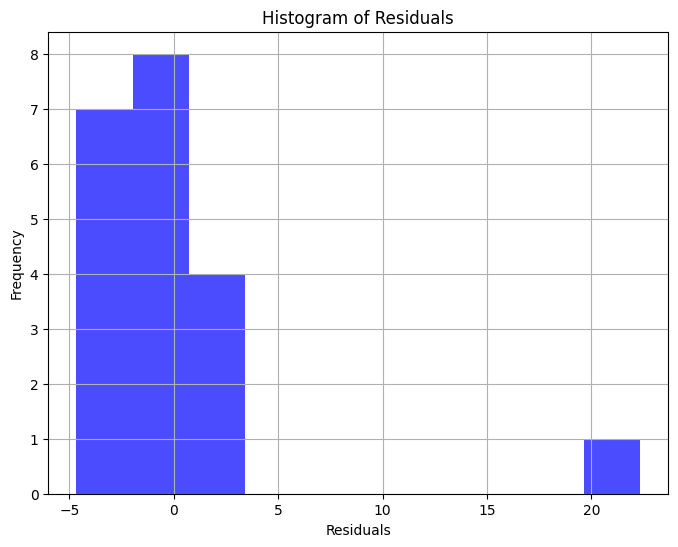

Estimated parameters:
Weight (w): -0.3223570973273493
Bias (b): 29.602425638572946


In [10]:
# Parameters
w = 0.0
b = 0.0
alpha = 0.01
iterations = 10000

w_final, b_final, cost_history, y_pred = gradient_descent(X, y, w, b, alpha, iterations)

residuals = y - y_pred
plot_residuals_histogram(residuals)
print(f"Estimated parameters:\nWeight (w): {w_final}\nBias (b): {b_final}")


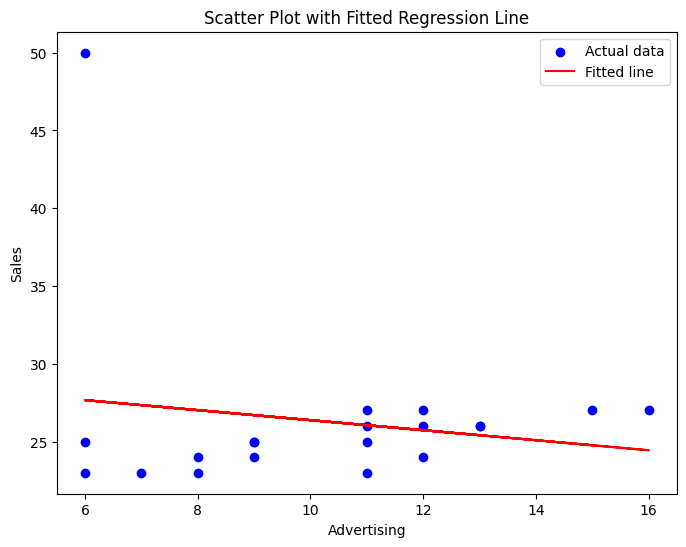

In [11]:

# Create scatter plot of original data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')

# Add the regression line
plt.plot(X, y_pred, color='red', label='Fitted line')

# Adding plot labels and title
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Scatter Plot with Fitted Regression Line')
plt.legend()

# Show the plot
plt.show()

In [20]:
SE_w, t_value = calculate_statistics(X, y, y_pred)
print(f"Standard Error of slope: {SE_w}\nT-value of slope: {t_value}")


Standard Error of slope: 0.45891129651800133
T-value of slope: -0.7024387932335513


# Implementation removing the outlier

In [13]:
max_index = np.argmax(y)
X_new = np.delete(X, max_index)
y_new = np.delete (y, max_index)

<function matplotlib.pyplot.show(close=None, block=None)>

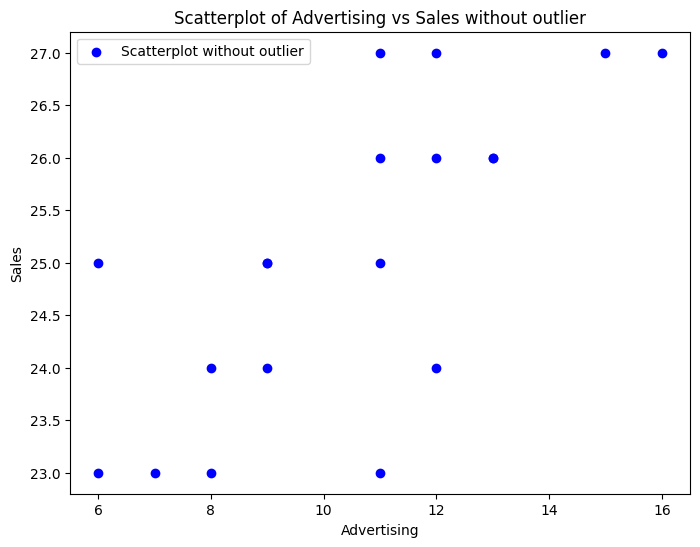

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_new, y_new, color="blue", label="Scatterplot without outlier")

#Add plot labels and title
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.title("Scatterplot of Advertising vs Sales without outlier")
plt.legend()

# Show the plot
plt.show

Iteration 0: Cost = 24.39949032657821
Iteration 1000: Cost = 4.4236921863008885
Iteration 2000: Cost = 1.5971955550378638
Iteration 3000: Cost = 0.8051070005804623
Iteration 4000: Cost = 0.5831345873948578
Iteration 5000: Cost = 0.5209297342402893
Iteration 6000: Cost = 0.5034976412137278
Iteration 7000: Cost = 0.4986125261161717
Iteration 8000: Cost = 0.49724353677679595
Iteration 9000: Cost = 0.4968598954963149


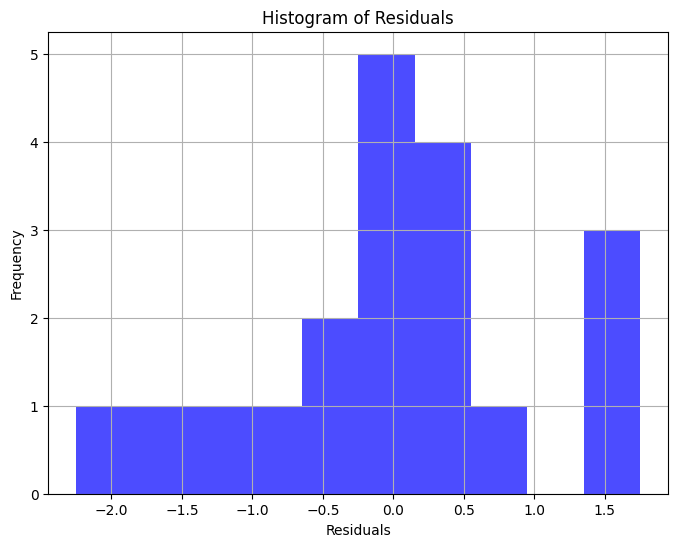

Estimated parameters:
Weight (w): 0.3782332852723425
Bias (b): 21.088836080034422


In [16]:
# Parameters
w = 0.0
b = 0.0
alpha = 0.01
iterations = 10000

w_final, b_final, cost_history, y_pred = gradient_descent(X_new, y_new, w, b, alpha, iterations)

residuals = y_new - y_pred
plot_residuals_histogram(residuals)
print(f"Estimated parameters:\nWeight (w): {w_final}\nBias (b): {b_final}")

In [17]:
SE_w, t_value = calculate_statistics(X_new, y_new, y_pred)
print(f"Standard Error of slope: {SE_w}\nT-value of slope: {t_value}")


Standard Error of slope: 0.08820014977070663
T-value of slope: 4.288351961483435


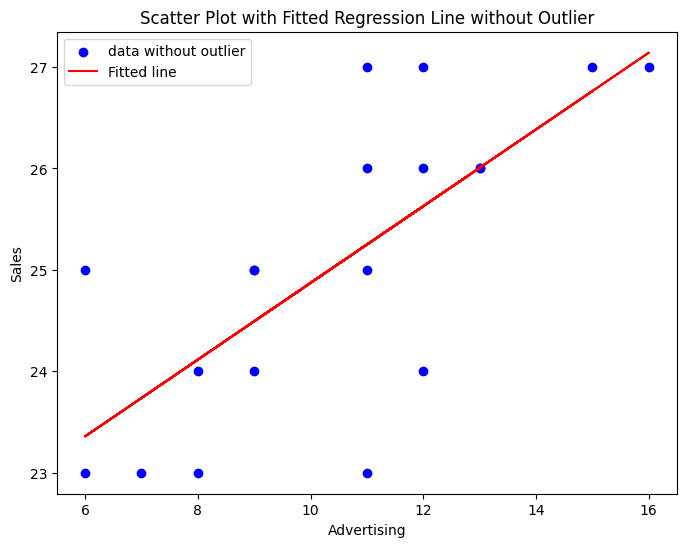

In [19]:

# Create scatter plot of original data
plt.figure(figsize=(8, 6))
plt.scatter(X_new, y_new, color='blue', label='data without outlier')

# Add the regression line
plt.plot(X_new, y_pred, color='red', label='Fitted line')

# Adding plot labels and title
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Scatter Plot with Fitted Regression Line without Outlier')
plt.legend()

# Show the plot
plt.show()